In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [36]:
data=pd.read_excel("career_pred.xlsx")

In [37]:
data

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,1,4,2,2,1,4,4,3,3,NaN
7521,2,3,3,3,4,3,2,1,3,3,...,4,2,3,2,4,1,3,3,2,NaN
7522,3,2,1,2,1,1,1,2,2,3,...,1,3,1,1,3,5,3,3,4,NaN
7523,2,1,1,1,2,1,1,2,2,2,...,1,3,2,1,2,4,4,3,4,NaN


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sslc                  7525 non-null   int64 
 1   hsc                   7525 non-null   int64 
 2   cgpa                  7525 non-null   int64 
 3   school_type           7525 non-null   int64 
 4   no_of_miniprojects    7525 non-null   int64 
 5   no_of_projects        7525 non-null   int64 
 6   coresub_skill         7525 non-null   int64 
 7   aptitude_skill        7525 non-null   int64 
 8   problemsolving_skill  7525 non-null   int64 
 9   programming_skill     7525 non-null   int64 
 10  abstractthink_skill   7525 non-null   int64 
 11  design_skill          7525 non-null   int64 
 12  first_computer        7525 non-null   int64 
 13  first_program         7525 non-null   int64 
 14  lab_programs          7525 non-null   int64 
 15  ds_coding             7525 non-null   

In [39]:
def convert_to_int(remain_df, col_name):
    new_df = remain_df.copy()  # create a copy of the original dataframe
    new_df[col_name] = pd.to_numeric(new_df[col_name], errors='coerce').astype('Int64')  # convert the specified column to int64
    return new_df

In [43]:
df = convert_to_int(data, 'learning_style')
print(df.dtypes)

sslc                     int64
hsc                      int64
cgpa                     int64
school_type              int64
no_of_miniprojects       int64
no_of_projects           int64
coresub_skill            int64
aptitude_skill           int64
problemsolving_skill     int64
programming_skill        int64
abstractthink_skill      int64
design_skill             int64
first_computer           int64
first_program            int64
lab_programs             int64
ds_coding                int64
technology_used          int64
sympos_attend            int64
sympos_won               int64
extracurricular          int64
learning_style           Int64
college_bench            int64
clg_teachers_know        int64
college_performence      int64
college_skills           int64
ROLE                    object
dtype: object


In [44]:
from sklearn.cluster import DBSCAN
import pandas as pd

# Load data
# data = pd.read_csv('data.csv')

# Select data for clustering
X = df.iloc[:, :-1]
def convert_to_int(remain_df, col_name):
    new_df = remain_df.copy()  # create a copy of the original dataframe
    new_df[col_name] = pd.to_numeric(new_df[col_name], errors='coerce').astype('Int64')  # convert the specified column to int64
    return new_df
df = convert_to_int(X, 'learning_style')
print(X.dtypes)
X.dtypes

sslc                    int64
hsc                     int64
cgpa                    int64
school_type             int64
no_of_miniprojects      int64
no_of_projects          int64
coresub_skill           int64
aptitude_skill          int64
problemsolving_skill    int64
programming_skill       int64
abstractthink_skill     int64
design_skill            int64
first_computer          int64
first_program           int64
lab_programs            int64
ds_coding               int64
technology_used         int64
sympos_attend           int64
sympos_won              int64
extracurricular         int64
learning_style          Int64
college_bench           int64
clg_teachers_know       int64
college_performence     int64
college_skills          int64
dtype: object


sslc                    int64
hsc                     int64
cgpa                    int64
school_type             int64
no_of_miniprojects      int64
no_of_projects          int64
coresub_skill           int64
aptitude_skill          int64
problemsolving_skill    int64
programming_skill       int64
abstractthink_skill     int64
design_skill            int64
first_computer          int64
first_program           int64
lab_programs            int64
ds_coding               int64
technology_used         int64
sympos_attend           int64
sympos_won              int64
extracurricular         int64
learning_style          Int64
college_bench           int64
clg_teachers_know       int64
college_performence     int64
college_skills          int64
dtype: object

In [51]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [69]:
# Adjust hyperparameters
eps =2
min_samples = 5

# Create DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model
model = dbscan.fit(X_imputed)

# Get the labels and number of clusters
labels = model.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_points = list(labels).count(-1)

# Print the results
print("Number of clusters found:", num_clusters)
print("Number of noise points:", num_noise_points)


Number of clusters found: 11
Number of noise points: 7413


In [71]:
role=data["ROLE"]

In [72]:
role_list=role.unique()
role_list

array(['Technical Support', 'Software Developer', 'UI/UX Designer',
       'Data Analyst', 'Technical Writer', 'Web Developer',
       'Software Tester', 'Business Analyst', nan], dtype=object)

In [73]:
len(role_list)

9

In [74]:
Labeled_data=df.iloc[:49,:]

In [11]:
Labeled_data


,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst
5,1,1,1,1,1,1,2,2,3,2,...,1,3,2,1,2,5,3,3,5,Technical Writer
6,3,3,2,2,2,1,2,4,3,3,...,1,3,2,1,1,5,4,4,4,Web Developer
7,3,3,2,2,1,1,2,1,2,2,...,1,3,3,3,4,5,4,3,3,Technical Support
8,3,2,3,3,1,1,1,2,3,5,...,1,3,3,3,2,5,4,3,3,Technical Writer
9,4,4,2,2,1,1,2,2,3,3,...,1,1,2,2,3,5,4,4,5,Software Tester


In [76]:

# create scaler object
scaler = MinMaxScaler()

# fit and transform the data
label = scaler.fit_transform(Labeled_data)

len(label)

49

In [78]:
label

array([[0.33333333, 0.66666667, 0.33333333, ..., 0.66666667, 1.        ,
        1.        ],
       [0.66666667, 0.        , 0.33333333, ..., 0.66666667, 0.        ,
        0.75      ],
       [0.66666667, 1.        , 0.33333333, ..., 0.66666667, 0.        ,
        0.75      ],
       ...,
       [1.        , 0.66666667, 0.33333333, ..., 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.66666667, 0.33333333, ..., 0.66666667, 0.        ,
        0.        ],
       [1.        , 0.66666667, 0.66666667, ..., 0.66666667, 0.        ,
        1.        ]])

In [79]:
remain_df=df.iloc[50:,:]

In [81]:
# remain_df=remain_df.drop("ROLE",axis=1)

In [82]:
remain_df

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
50,3,4,1,1,3,1,1,1,3,3,...,1,1,4,1,1,2,5,3,3,4
51,4,4,2,1,1,1,2,2,2,2,...,1,1,3,5,3,4,4,3,3,5
52,4,4,4,1,2,1,1,2,3,3,...,3,1,3,3,1,1,3,4,4,3
53,3,4,1,2,1,1,2,2,4,3,...,4,1,1,2,1,2,3,4,3,1
54,1,3,1,2,1,1,2,1,2,2,...,1,1,1,2,4,2,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,4,1,4,2,2,1,4,4,3,3
7521,2,3,3,3,4,3,2,1,3,3,...,3,4,2,3,2,4,1,3,3,2
7522,3,2,1,2,1,1,1,2,2,3,...,2,1,3,1,1,3,5,3,3,4
7523,2,1,1,1,2,1,1,2,2,2,...,2,1,3,2,1,2,4,4,3,4


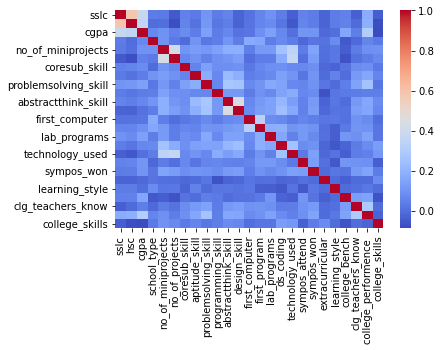

In [83]:
corr_matrix = remain_df.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

# Show plot
plt.show()

In [84]:
n_missing = remain_df.isna().sum().sum()
print("Number of missing values in remain_df: ", n_missing)


Number of missing values in remain_df:  2


In [85]:
remain_df.dropna(inplace=True)


/tmp/ipykernel_25862/2383387008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_df.dropna(inplace=True)


In [86]:
remain_df

,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,ds_coding,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills
50,3,4,1,1,3,1,1,1,3,3,...,1,1,4,1,1,2,5,3,3,4
51,4,4,2,1,1,1,2,2,2,2,...,1,1,3,5,3,4,4,3,3,5
52,4,4,4,1,2,1,1,2,3,3,...,3,1,3,3,1,1,3,4,4,3
53,3,4,1,2,1,1,2,2,4,3,...,4,1,1,2,1,2,3,4,3,1
54,1,3,1,2,1,1,2,1,2,2,...,1,1,1,2,4,2,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,3,2,1,2,1,1,2,2,3,3,...,4,1,4,2,2,1,4,4,3,3
7521,2,3,3,3,4,3,2,1,3,3,...,3,4,2,3,2,4,1,3,3,2
7522,3,2,1,2,1,1,1,2,2,3,...,2,1,3,1,1,3,5,3,3,4
7523,2,1,1,1,2,1,1,2,2,2,...,2,1,3,2,1,2,4,4,3,4


In [87]:
column_names = remain_df.columns.tolist()
print(column_names)

['sslc', 'hsc', 'cgpa', 'school_type', 'no_of_miniprojects', 'no_of_projects', 'coresub_skill', 'aptitude_skill', 'problemsolving_skill', 'programming_skill', 'abstractthink_skill', 'design_skill', 'first_computer', 'first_program', 'lab_programs', 'ds_coding', 'technology_used', 'sympos_attend', 'sympos_won', 'extracurricular', 'learning_style', 'college_bench', 'clg_teachers_know', 'college_performence ', 'college_skills']


In [88]:
print(remain_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7473 entries, 50 to 7524
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sslc                  7473 non-null   int64
 1   hsc                   7473 non-null   int64
 2   cgpa                  7473 non-null   int64
 3   school_type           7473 non-null   int64
 4   no_of_miniprojects    7473 non-null   int64
 5   no_of_projects        7473 non-null   int64
 6   coresub_skill         7473 non-null   int64
 7   aptitude_skill        7473 non-null   int64
 8   problemsolving_skill  7473 non-null   int64
 9   programming_skill     7473 non-null   int64
 10  abstractthink_skill   7473 non-null   int64
 11  design_skill          7473 non-null   int64
 12  first_computer        7473 non-null   int64
 13  first_program         7473 non-null   int64
 14  lab_programs          7473 non-null   int64
 15  ds_coding             7473 non-null   int64
 16  techn

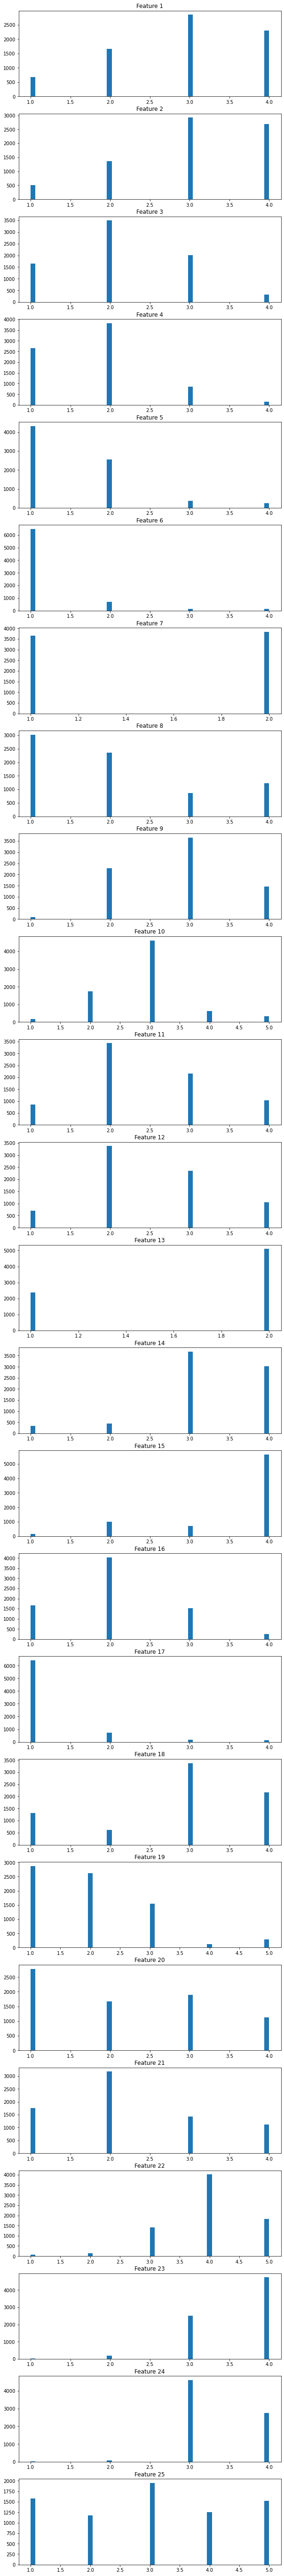

In [89]:

# fig, axs = plt.subplots(nrows=13, ncols=6, figsize=(35, 35))
# # axs = axs.ravel()

# for i, col in enumerate(remain_df.columns):
#     axs[i % 30].hist(remain_df[col], bins=50)
#     axs[i % 30].set_title(f"Feature {i+1}")
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=25, ncols=1, figsize=(10, 100))
for i, col in enumerate(remain_df.columns):
    axs[i % 30].hist(remain_df[col], bins=50)
    axs[i % 30].set_title(f"Feature {i+1}")
plt.show()


<AxesSubplot:xlabel='programming_skill', ylabel='Count'>

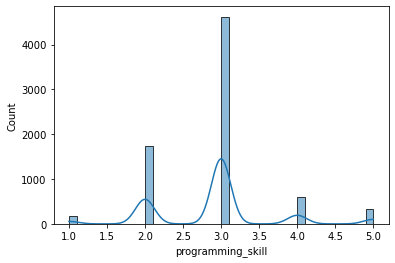

In [90]:
import seaborn as sns

sns.histplot(data=remain_df, x='programming_skill', kde=True)


/home/mirza/.local/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/home/mirza/.local/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


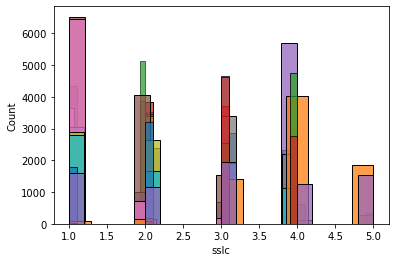

In [91]:
import seaborn as sns

# create a histogram for each column in the dataset
for col in remain_df.columns:
    sns.histplot(df[col])


In [27]:
# import seaborn as sns

# # create a density plot for each column in the dataset
# for col in remain_df.columns:
#     sns.kdeplot(df[col])


In [92]:
# calculate the Shapiro-Wilk statistic for each column
from scipy.stats import shapiro

for col in remain_df.columns:
    stat, p = shapiro(remain_df[col])
    print(col, ': Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print(col, 'looks Gaussian (fail to reject H0)')
    else:
        print(col, 'does not look Gaussian (reject H0)')



sslc : Statistics=0.855, p=0.000
sslc does not look Gaussian (reject H0)
hsc : Statistics=0.835, p=0.000
hsc does not look Gaussian (reject H0)
cgpa : Statistics=0.855, p=0.000
cgpa does not look Gaussian (reject H0)
school_type : Statistics=0.797, p=0.000
school_type does not look Gaussian (reject H0)
no_of_miniprojects : Statistics=0.699, p=0.000
no_of_miniprojects does not look Gaussian (reject H0)
no_of_projects : Statistics=0.390, p=0.000
no_of_projects does not look Gaussian (reject H0)
coresub_skill : Statistics=0.636, p=0.000
coresub_skill does not look Gaussian (reject H0)
aptitude_skill : Statistics=0.802, p=0.000
aptitude_skill does not look Gaussian (reject H0)
problemsolving_skill : Statistics=0.831, p=0.000
problemsolving_skill does not look Gaussian (reject H0)
programming_skill : Statistics=0.801, p=0.000
programming_skill does not look Gaussian (reject H0)
abstractthink_skill : Statistics=0.864, p=0.000
abstractthink_skill does not look Gaussian (reject H0)
design_skil

/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
column_names = remain_df.columns.tolist()
print(column_names)

['sslc', 'hsc', 'cgpa', 'school_type', 'no_of_miniprojects', 'no_of_projects', 'coresub_skill', 'aptitude_skill', 'problemsolving_skill', 'programming_skill', 'abstractthink_skill', 'design_skill', 'first_computer', 'first_program', 'lab_programs', 'ds_coding', 'technology_used', 'sympos_attend', 'sympos_won', 'extracurricular', 'learning_style', 'college_bench', 'clg_teachers_know', 'college_performence ', 'college_skills']


In [94]:
from sklearn.preprocessing import MinMaxScaler

# create the scaler object
scaler = MinMaxScaler()

# fit and transform the data
x_scaled = scaler.fit_transform(remain_df)
x_scaled

array([[0.66666667, 1.        , 0.        , ..., 0.66666667, 0.66666667,
        0.75      ],
       [1.        , 1.        , 0.33333333, ..., 0.66666667, 0.66666667,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.5       ],
       ...,
       [0.66666667, 0.33333333, 0.        , ..., 0.66666667, 0.66666667,
        0.75      ],
       [0.33333333, 0.        , 0.        , ..., 1.        , 0.66666667,
        0.75      ],
       [0.33333333, 0.33333333, 0.33333333, ..., 0.66666667, 0.66666667,
        1.        ]])

In [100]:
from sklearn.cluster import DBSCAN

# Instantiate DBSCAN with eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=4, min_samples=3)

# Fit the model to the data
dbscan.fit(x_scaled)

# Get the labels of the clusters
labels = dbscan.labels_

# Print the number of clusters found
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters found:', n_clusters)

# Print the noise points (if any)
n_noise = list(labels).count(-1)
print('Number of noise points:', n_noise)


Number of clusters found: 1
Number of noise points: 0


In [101]:
from sklearn.cluster import KMeans

# initialize k-means algorithm with 3 clusters
kmeans = KMeans(n_clusters=9, random_state=42)

# fit the scaled data to the k-means algorithm
kmeans.fit(x_scaled)

# get the cluster labels for each data point
labels = kmeans.labels_

# print the labels
print(labels)

/home/mirza/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 8 0 ... 0 0 5]


In [ ]:
len(labels)

/home/mirza/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mirza/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mirza/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mirza/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mirza/.local/lib/python3.10/si

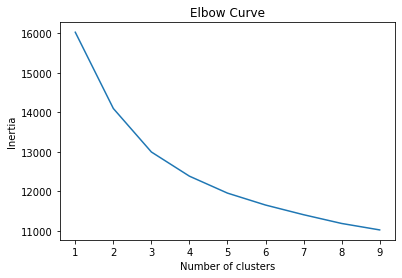

In [102]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create an array of inertia values for different k values
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    inertia_values.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 10), inertia_values)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
